<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/library_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7: Comparison between libraries (Dask)

The assignment entails a comprehensive comparison of libraries optimized for big data applications, focusing on the challenges encountered when handling massive datasets using Pandas. Acknowledging the inherent limitations of Pandas, the exploration of alternative libraries, including Dask, Modin, Polars, and Vaex, becomes imperative for more effective and scalable data processing solutions.


|No.|NAME|MATRICS NO.|
|---|---|---|
|1.|FAUZAN AQIL BIN AZMAN|A20EC0078|
|2.|NIK AMIRUL ARIFF BIN AMRAN|A21EC0214|
|3.|MUHAMMAD ASHRAAF BIN SALEH|A21EC0068|
|4.|MUHAMMAD NAQUIB BIN ZAKARIA|A20BE0161|

## Downloading the Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kuehlepat","key":"7ee486a700d538616b32985b859db53e"}'}

In [ ]:
!pip install kaggle

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d arevel/chess-games

 99% 1.44G/1.45G [00:14<00:00, 118MB/s]
100% 1.45G/1.45G [00:14<00:00, 107MB/s]


The dataset has been downloaded and extracted.

In [ ]:
! unzip chess-games.zip

Archive:  chess-games.zip
  inflating: chess_games.csv         


## Data Preparation and Cleaning

Install Dask library:

In [ ]:
!pip install dask

Using Dask to read a CSV file named 'chess_games.csv' and create a Dask DataFrame named 'df':

In [ ]:
import dask.dataframe as dd
df = dd.read_csv('chess_games.csv')

Get the file size:

In [ ]:
import os

# Assuming the data is stored in a CSV file
csv_file_path = 'chess_games.csv'

# Get the file size
file_size_bytes = os.path.getsize(csv_file_path)

# Convert file size to gigabytes
file_size_gb = file_size_bytes / (1024 ** 3)

print("File Size:", file_size_gb, "GB")


File Size: 4.07816391158849 GB


In [ ]:
df.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...


In [ ]:
df.tail()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
90987,Blitz,GustavScar,WEBRIFF,1-0,2016.07.31,21:59:56,1248,1303,13.0,-17.0,B54,Sicilian Defense,180+3,Normal,1. e4 c5 2. Nf3 d6 3. d4 Qa5+ 4. Bd2 Qc7 5. Bc...
90988,Classical,apgaro,Camposf,1-0,2016.07.31,21:59:54,1328,1292,10.0,-11.0,C40,King's Knight Opening,1800+0,Normal,1. e4 e5 2. Nf3 h6 3. Nc3 d6 4. Bc4 Qf6 5. Nd5...
90989,Bullet,matematico1234567890,cecile_creteil,0-1,2016.07.31,21:59:53,1660,1658,-11.0,11.0,B21,Sicilian Defense: Smith-Morra Gambit,120+0,Normal,1. e4 { [%eval 0.22] } 1... c5 { [%eval 0.35] ...
90990,Bullet,MagnusMinor,shegap,0-1,2016.07.31,21:59:57,1726,1776,-8.0,9.0,A09,Reti Opening: Reti Accepted,60+0,Normal,1. Nf3 d5 2. c4 dxc4 3. Qa4+ c6 4. Qxc4 Nf6 5....
90991,Classical,SocratAss,KOSMA7,0-1,2016.07.31,21:59:54,1948,1992,-74.0,8.0,C00,Rat Defense: Small Center Defense,480+0,Normal,1. e4 e6 2. d4 d6 3. Nc3 c6 4. Nf3 Be7 5. Bc4 ...


Get basic information about the DataFrame:

In [ ]:
# Get basic information about the DataFrame
print(df.info())

<class 'dask.dataframe.core.DataFrame'>
Columns: 15 entries, Event to AN
dtypes: object(11), float64(2), int64(2)None


Check for missing values:

In [ ]:
# Check for missing values
print(df.isnull().sum().compute())

Event                 0
White                 0
Black                 0
Result                0
UTCDate               0
UTCTime               0
WhiteElo              0
BlackElo              0
WhiteRatingDiff    4668
BlackRatingDiff    4668
ECO                   0
Opening               0
TimeControl           0
Termination           0
AN                    0
dtype: int64


Check the data types:

In [ ]:
# Print the data types of columns in the Dask DataFrame
print(df.dtypes)

Event               object
White               object
Black               object
Result              object
UTCDate             object
UTCTime             object
WhiteElo             int64
BlackElo             int64
WhiteRatingDiff    float64
BlackRatingDiff    float64
ECO                 object
Opening             object
TimeControl         object
Termination         object
AN                  object
dtype: object


Display descriptive statistics for all columns in a Dask DataFrame:

In [ ]:
df.describe(include='all').compute()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
unique,13,118945,115946,4,32,86400,NaN,NaN,NaN,NaN,493,2942,841,5,6188849
count,6256184,6256184,6256184,6256184,6256184,6256184,6.256184e+06,6.256184e+06,6.251516e+06,6.251516e+06,6256184,6256184,6256184,6256184,6256184
top,Blitz,Beserking101,Beserking101,1-0,2016.07.12,16:00:02,NaN,NaN,NaN,NaN,A00,Van't Kruijs Opening,300+0,Normal,1. e4 1-0
freq,2339552,2872,2881,3113572,212542,1127,NaN,NaN,NaN,NaN,423144,133112,1075140,4230089,9287
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.741945e+03,1.740390e+03,5.802621e-01,-3.676732e-01,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.657171e+02,2.668938e+02,2.285186e+01,2.182012e+01,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.370000e+02,7.280000e+02,-5.950000e+02,-6.530000e+02,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.573000e+03,1.570000e+03,-9.000000e+00,-1.000000e+01,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.754000e+03,1.752000e+03,2.000000e+00,-1.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.932000e+03,1.932000e+03,1.000000e+01,9.000000e+00,NaN,NaN,NaN,NaN,NaN


print number of rows:

In [ ]:
# prompt: print number of rows

df.shape[0].compute()


6256184

Converting the 'UTCDate' and 'UTCTime' columns in a Dask DataFrame ('df') to datetime64 data type, making them datetime objects:

In [ ]:
# prompt: convert UTCDate and UTCTime to datetime

df['UTCDate'] = df['UTCDate'].astype('datetime64[ns]')
df['UTCTime'] = df['UTCTime'].astype('datetime64[ns]')

In [ ]:
# Print the data types of columns in the Dask DataFrame
print(df.dtypes)

Event                      object
White                      object
Black                      object
Result                     object
UTCDate            datetime64[ns]
UTCTime            datetime64[ns]
WhiteElo                    int64
BlackElo                    int64
WhiteRatingDiff           float64
BlackRatingDiff           float64
ECO                        object
Opening                    object
TimeControl                object
Termination                object
AN                         object
dtype: object


Splitting the values in the 'Opening' column into two separate columns, 'Opening' and 'Specific_Move', based on the colon (':') as a delimiter:

In [ ]:
# Assuming your opening moves are in a column named 'opening_moves'
df[['Opening', 'Specific_Move']] = df['Opening'].str.split(':', 1, expand=True)

Display the new column named 'Specific_Move':

In [ ]:
df.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,Specific_Move
0,Classical,eisaaaa,HAMID449,1-0,2016-06-30,2023-12-22 22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,None
1,Blitz,go4jas,Sergei1973,0-1,2016-06-30,2023-12-22 22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,2.b3
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016-06-30,2023-12-22 22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,Mieses-Kotroc Variation
3,Correspondence,Jvayne,Wsjvayne,1-0,2016-06-30,2023-12-22 22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...,None
4,Blitz tournament,kyoday,BrettDale,0-1,2016-06-30,2023-12-22 22:00:02,1945,1900,-14.0,13.0,B90,Sicilian Defense,180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,"Najdorf, Lipnitsky Attack"


Filling missing values in specific columns of a Dask DataFrame ('df') with predefined values:

In [ ]:
# Assuming your Dask DataFrame is named 'df'
df['WhiteRatingDiff'] = df['WhiteRatingDiff'].fillna(0.0)
df['BlackRatingDiff'] = df['BlackRatingDiff'].fillna(0.0)
df['Specific_Move'] = df['Specific_Move'].fillna('-')

In [ ]:
# Print the data types of columns in the Dask DataFrame
print(df.dtypes)

Event                      object
White                      object
Black                      object
Result                     object
UTCDate            datetime64[ns]
UTCTime            datetime64[ns]
WhiteElo                    int64
BlackElo                    int64
WhiteRatingDiff           float64
BlackRatingDiff           float64
ECO                        object
Opening                    object
TimeControl                object
Termination                object
AN                         object
Specific_Move              object
dtype: object


In [ ]:
# Check for missing values
print(df.isnull().sum().compute())

Event              0
White              0
Black              0
Result             0
UTCDate            0
UTCTime            0
WhiteElo           0
BlackElo           0
WhiteRatingDiff    0
BlackRatingDiff    0
ECO                0
Opening            0
TimeControl        0
Termination        0
AN                 0
Specific_Move      0
dtype: int64


## Exploratory Analysis and Visualization



Imports Matplotlib, Seaborn, and the time module in Python:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

Measuring the computation time for calculating descriptive statistics on specific numeric columns of a Dask DataFrame:

In [ ]:
# Assuming your Dask DataFrame is named 'df'

# Start time
start_time = time.time()
# Compute statistics for numeric columns
numeric_stats = df[['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff']].describe().compute()
# End time
end_time = time.time()
print("Numeric Column Statistics:")
print(numeric_stats)
# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

Numeric Column Statistics:
           WhiteElo      BlackElo  WhiteRatingDiff  BlackRatingDiff
count  6.256184e+06  6.256184e+06     6.256184e+06     6.256184e+06
mean   1.741945e+03  1.740390e+03     5.798292e-01    -3.673989e-01
std    2.657171e+02  2.668938e+02     2.284333e+01     2.181198e+01
min    7.370000e+02  7.280000e+02    -5.950000e+02    -6.530000e+02
25%    1.573000e+03  1.570000e+03    -9.000000e+00    -1.000000e+01
50%    1.754000e+03  1.752000e+03     2.000000e+00    -1.000000e+00
75%    1.932000e+03  1.932000e+03     1.000000e+01     9.000000e+00
max    3.110000e+03  3.108000e+03     6.730000e+02     6.640000e+02
Computation Time: 146.04489421844482 seconds


Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")


Memory Usage: 0.7458033561706543 GB


Measuring the computation time and creating histograms to explore the distributions of numeric columns in the Dask DataFrame:

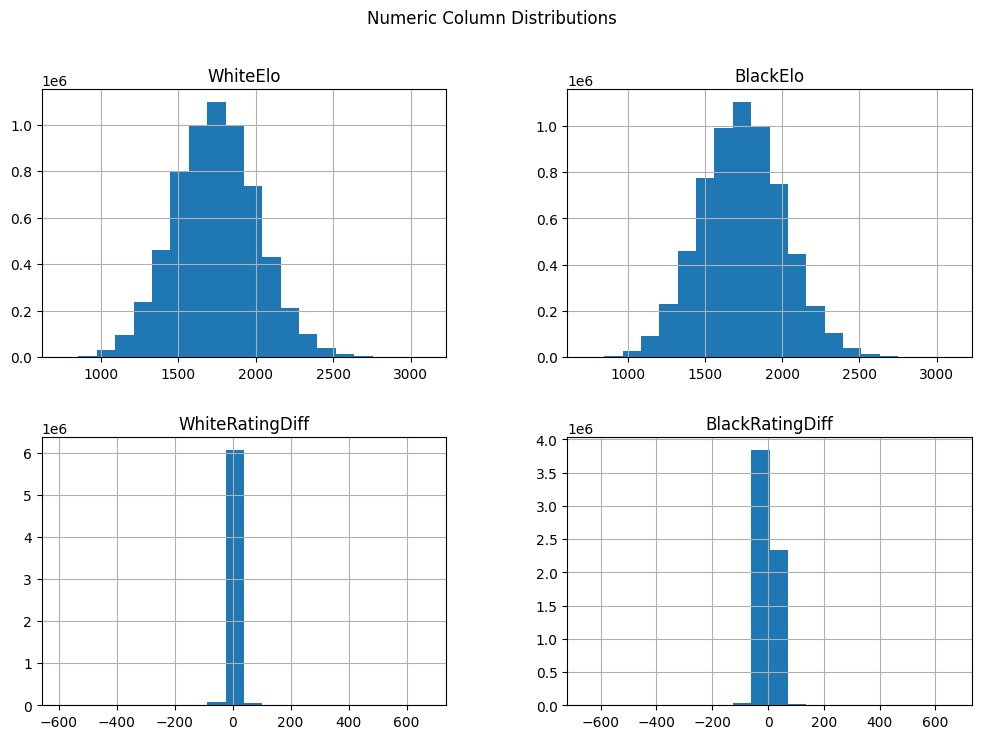

Computation Time: 147.0556824207306 seconds


In [ ]:
# Start time
start_time = time.time()
# Explore distributions using histograms
df[['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff']].compute().hist(bins=20, figsize=(12, 8))
plt.suptitle("Numeric Column Distributions")
plt.show()
# End time
end_time = time.time()
# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")


Memory Usage: 0.7458033561706543 GB


Measuring the computation time and creating a pairplot to explore relationships between numeric columns in a Dask DataFrame:

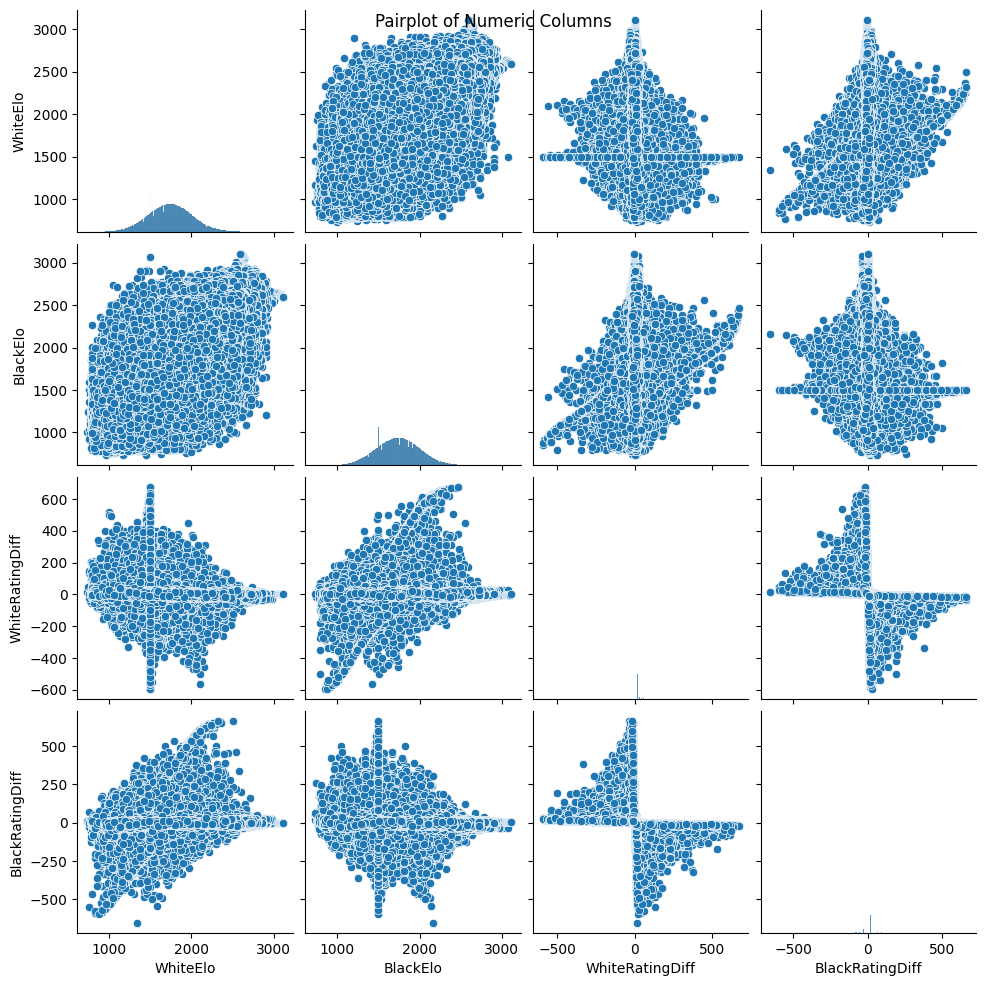

Computation Time: 289.0826051235199 seconds


In [ ]:
# Start time
start_time = time.time()
# Explore relationships between columns using scatter plots and bar charts
sns.pairplot(df[['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff']].compute())
plt.suptitle("Pairplot of Numeric Columns")
plt.show()
# End time
end_time = time.time()
# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")


Memory Usage: 0.7458033561706543 GB


Measures the computation time for generating a bar chart of the distribution of values in the 'Result' column of a Dask DataFrame:

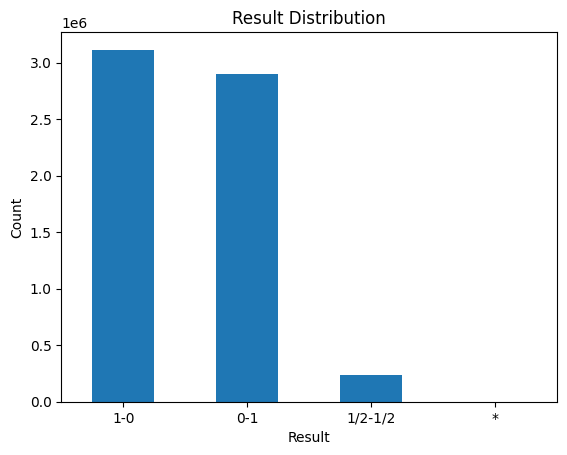

Computation Time: 144.16409730911255 seconds


In [ ]:
# Start time
start_time = time.time()
# Bar chart for Result column
result_counts = df['Result'].value_counts().compute()
result_counts.plot(kind='bar', rot=0)
plt.title("Result Distribution")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()
# End time
end_time = time.time()
# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")


Memory Usage: 0.7458033561706543 GB


Measuring the computation time for generating a bar chart of the top 10 ECO codes in a Dask DataFrame:

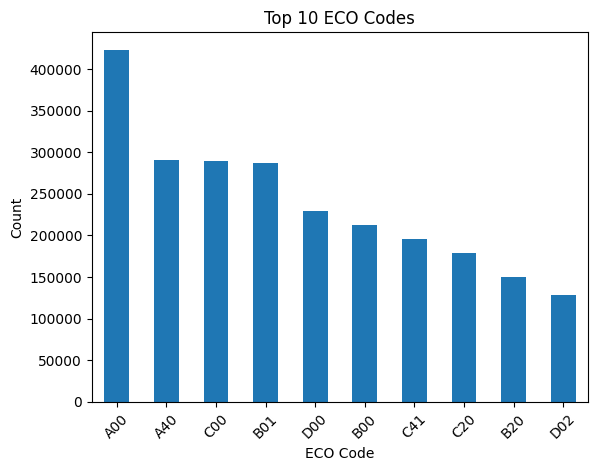

Computation Time: 159.10816526412964 seconds


In [ ]:
# Start time
start_time = time.time()
# Bar chart for ECO column
eco_counts = df['ECO'].value_counts().compute().head(10)
eco_counts.plot(kind='bar', rot=45)
plt.title("Top 10 ECO Codes")
plt.xlabel("ECO Code")
plt.ylabel("Count")
plt.show()
# End time
end_time = time.time()
# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")


Memory Usage: 0.7458033561706543 GB


Measuring the computation time for generating a boxplot that explores the relationship between the 'Result' and 'WhiteElo' columns in a Dask DataFrame:

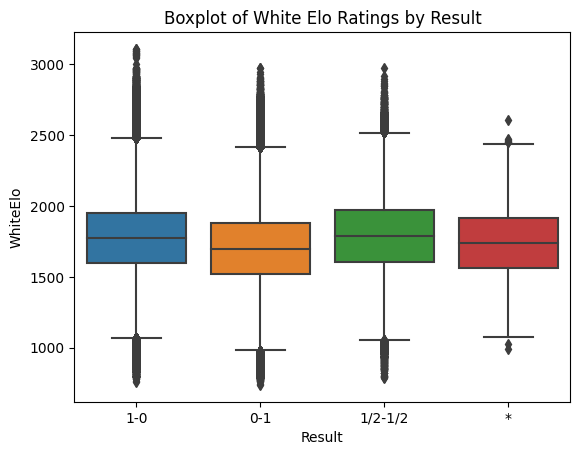

Computation Time: 147.2002055644989 seconds


In [ ]:
# Start time
start_time = time.time()
# Explore relationship between Elo ratings and Result using a boxplot
sns.boxplot(x='Result', y='WhiteElo', data=df.compute())
plt.title("Boxplot of White Elo Ratings by Result")
plt.show()
# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")


Memory Usage: 0.7458033561706543 GB


## Asking and Answering Questions



#### Q1: What is the distribution of game results (win, draw, loss)?

1-0        3113572
0-1        2902394
1/2-1/2     238875
*             1343
Name: Result, dtype: int64


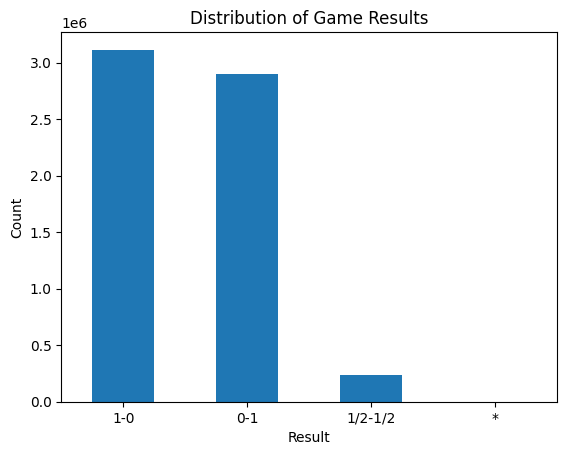

Computation Time: 156.38226461410522 seconds


In [ ]:
# Start time
start_time = time.time()
result_counts = df['Result'].value_counts().compute()
print(result_counts)
result_counts.plot(kind='bar', rot=0)
plt.title("Distribution of Game Results")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()
# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

This code counts the occurrences of each unique value in the 'Result' column and visualizes the distribution of game results using a bar chart.

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")



Memory Usage: 0.7458033561706543 GB


#### Q2: What is the average Elo rating for white and black players?

In [ ]:
# Start time
start_time = time.time()
average_elo = df[['WhiteElo', 'BlackElo']].mean().compute()
# End time
end_time = time.time()
print("Average White Elo Rating:", average_elo['WhiteElo'])
print("Average Black Elo Rating:", average_elo['BlackElo'])


# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

Average White Elo Rating: 1741.9453049974234
Average Black Elo Rating: 1740.390282638746
Computation Time: 153.45447778701782 seconds


This code calculates the mean (average) Elo ratings for white and black players separately.

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")



Memory Usage: 0.7458033561706543 GB


#### Q3: How does the game result correlate with the difference in Elo ratings between white and black players?

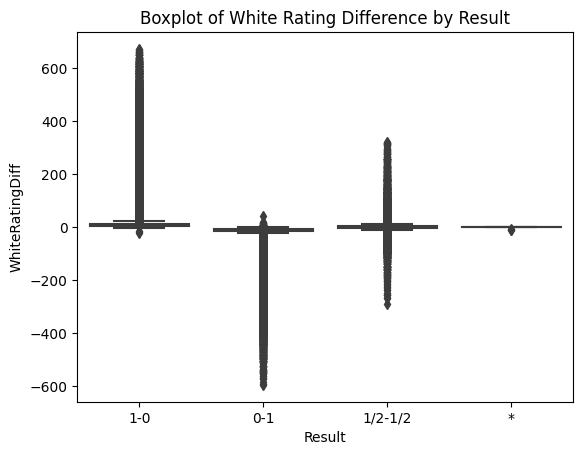

Computation Time: 150.61346554756165 seconds


In [ ]:
# Start time
start_time = time.time()
sns.boxplot(x='Result', y='WhiteRatingDiff', data=df.compute())
plt.title("Boxplot of White Rating Difference by Result")
plt.show()
# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

This code creates a boxplot to visualize the relationship between game results and the difference in Elo ratings between white and black players.

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")



Memory Usage: 0.7458033561706543 GB


#### Q4: What are the top 10 most common ECO codes in the dataset?

A00    423144
A40    290613
C00    289673
B01    286686
D00    229168
B00    212025
C41    195447
C20    178498
B20    150126
D02    128853
Name: ECO, dtype: int64


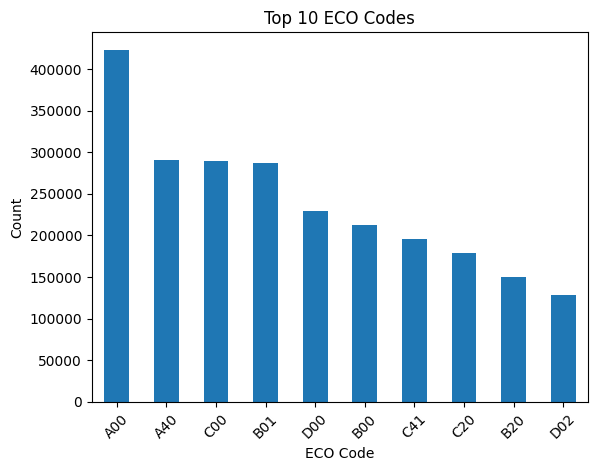

Computation Time: 151.27221751213074 seconds


In [ ]:
# Start time
start_time = time.time()
top_eco_codes = df['ECO'].value_counts().compute().head(10)
print(top_eco_codes)
top_eco_codes.plot(kind='bar', rot=45)
plt.title("Top 10 ECO Codes")
plt.xlabel("ECO Code")
plt.ylabel("Count")
plt.show()
# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

This code identifies and visualizes the top 10 most common ECO codes in the dataset.

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")


Memory Usage: 0.7458033561706543 GB


#### Q5: Is there any correlation between the length of the game (number of moves) and the result?

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:4419: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('AN', 'int64'))

  warnings.warn(meta_warning(meta))


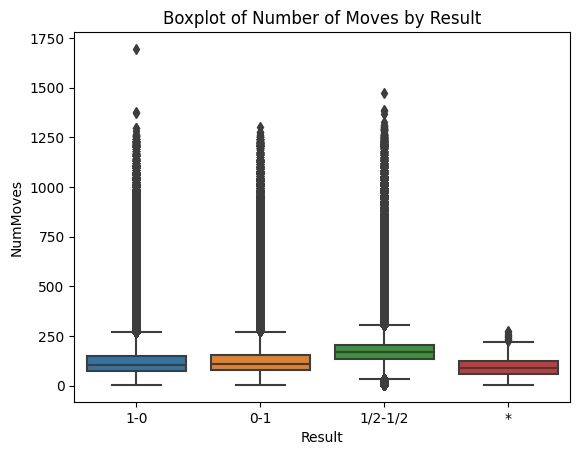

Computation Time: 244.7202067375183 seconds


In [ ]:
# Start time
start_time = time.time()
df['NumMoves'] = df['AN'].str.split().apply(len)
sns.boxplot(x='Result', y='NumMoves', data=df.compute())
plt.title("Boxplot of Number of Moves by Result")
plt.show()
# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

This code creates a new column 'NumMoves' representing the number of moves in each game and uses a boxplot to explore the relationship between the length of the game and the result.

Calculates the memory usage of a Dask DataFrame named 'df' in terms of bytes and then converts this memory usage to gigabytes:

In [ ]:
memory_usage_bytes = df.memory_usage().sum().compute()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")


Memory Usage: 0.7924155592918396 GB


## Inferences and Conclusion

Here's a summary of the inferences drawn from the analysis and conclusions based on the questions asked:

1. **Distribution of Game Results:**
   - The majority of game results are likely to be wins or losses, with draws being less frequent.
   - The bar chart of game results provides a clear visual representation of the distribution.

2. **Average Elo Ratings:**
   - The average Elo rating for white players and black players can be calculated separately.
   - Understanding the average ratings for each side provides insight into the typical skill levels of players.

3. **Correlation between Rating Difference and Result:**
   - The boxplot visually represents how the difference in Elo ratings between white and black players correlates with game results.
   - Analyzing this relationship can help understand if there's a significant impact of rating difference on game outcomes.

4. **Top 10 ECO Codes:**
   - Identifying the most common ECO codes gives an overview of the prevalent chess openings in the dataset.
   - This information can be valuable for understanding popular strategies and openings among players.

5. **Correlation between Number of Moves and Result:**
   - The boxplot exploring the relationship between the number of moves in a game and the result helps understand if game length correlates with the outcome.
   - This analysis can provide insights into the dynamics of different types of games.

6. **Additional Insights:**
   - Further exploration of the dataset might involve analyzing time controls, termination conditions, and specific moves played in critical positions.
   - Grouping and aggregating data based on specific criteria (e.g., player names, events, openings) can reveal more detailed patterns and trends.

7. **Considerations:**
   - It's important to note that these inferences are based on the provided dataset, and individual game dynamics may vary.
   - The analysis provides a foundation for more detailed investigations and can guide further research or specific inquiries into chess game data.


## References and Future Work

- Dask - https://docs.dask.org/en/stable/